In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import pandas as pd 
import os
import numpy as np
import cv2  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, , precision_score, recall_score, f1_score, confusion_matrix
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [2]:

base_path = "C:/Users/Ale/Downloads/colon_cancer/lung_colon_image_set/colon_image_sets/"
control_path = os.path.join(base_path, "colon_n/")
cancer_path = os.path.join(base_path, "colon_aca/")

colon_control = np.array([os.path.join(control_path, archivo) for archivo in os.listdir(control_path)])
colon_cancer = np.array([os.path.join(cancer_path, archivo) for archivo in os.listdir(cancer_path)])

# Mezclar los dos arrays
colon_mix = np.concatenate((colon_control, colon_cancer))



In [3]:

y  = [0 if path.split("/")[-2] == 'colon_n' else 1 for path in colon_mix]


In [4]:

X = np.array([cv2.resize(plt.imread(imagen), (224, 224)) / 255 for imagen in colon_mix], dtype=np.float16)


In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = tf.convert_to_tensor(X_train, dtype=tf.float16)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float16)

y_train = to_categorical(y_train, num_classes=2)


In [6]:

import tensorflow as tf
import tensorflow_hub as hub

model_url = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow1/variations/075-224-classification/versions/3"

model = tf.keras.Sequential([
    hub.KerasLayer(model_url, trainable=False),
    tf.keras.layers.Dense(2, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, to_categorical(y_test, num_classes=2)))

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)


Epoch 1/5
667/667 [==============================] - 15s 17ms/step - loss: 0.0503 - accuracy: 0.9808 - val_loss: 0.0102 - val_accuracy: 0.9970
Epoch 2/5
667/667 [==============================] - 10s 15ms/step - loss: 0.0108 - accuracy: 0.9965 - val_loss: 0.0096 - val_accuracy: 0.9970
Epoch 3/5
667/667 [==============================] - 10s 15ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0081 - val_accuracy: 0.9980
Epoch 4/5
667/667 [==============================] - 10s 15ms/step - loss: 0.0056 - accuracy: 0.9973 - val_loss: 0.0087 - val_accuracy: 0.9960
Epoch 5/5
32/32 [==============================] - 2s 47ms/step


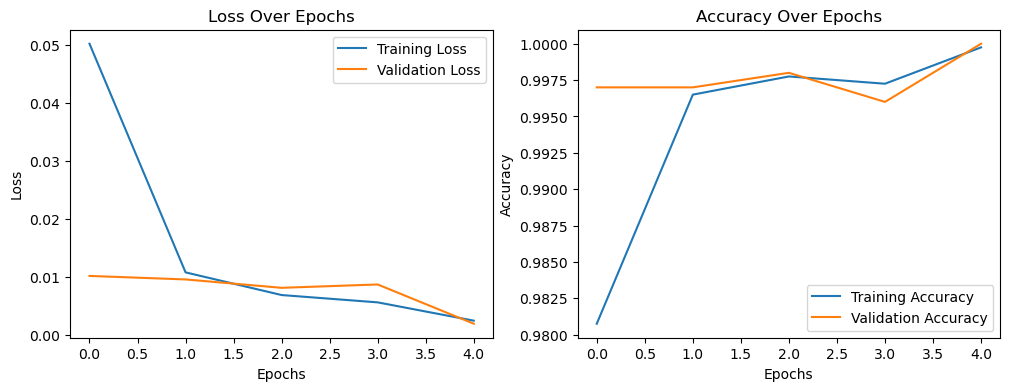

In [10]:

train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Graficar de pérdida 
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Grafica de Precisióm
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


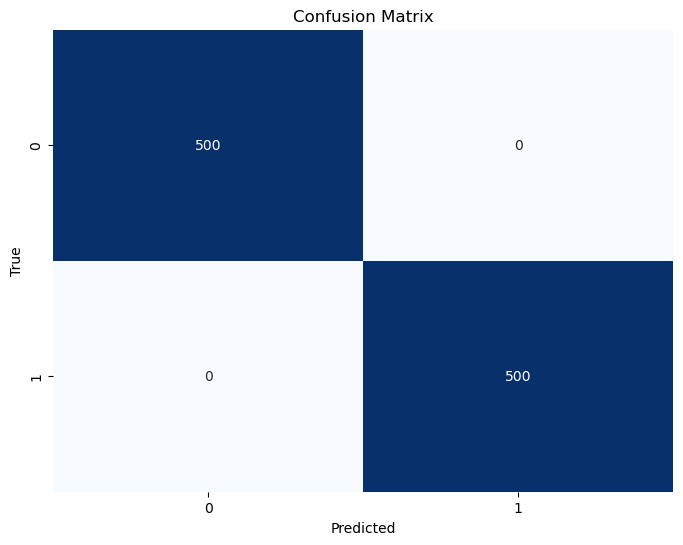

             Metric                 Value
0          Accuracy                   1.0
1         Precision                   1.0
2            Recall                   1.0
3          F1 Score                   1.0
4  Confusion Matrix  [[500, 0], [0, 500]]


In [11]:

def classification_metrics(y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)

    metrics_dict = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': confusion
    }

    metrics_df = pd.DataFrame(list(metrics_dict.items()), columns=['Metric', 'Value'])
    
    # Imprimir la matriz de confusión con un mapa de calor
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return metrics_df


metrics_table = classification_metrics(y_test, y_pred)
print(metrics_table)


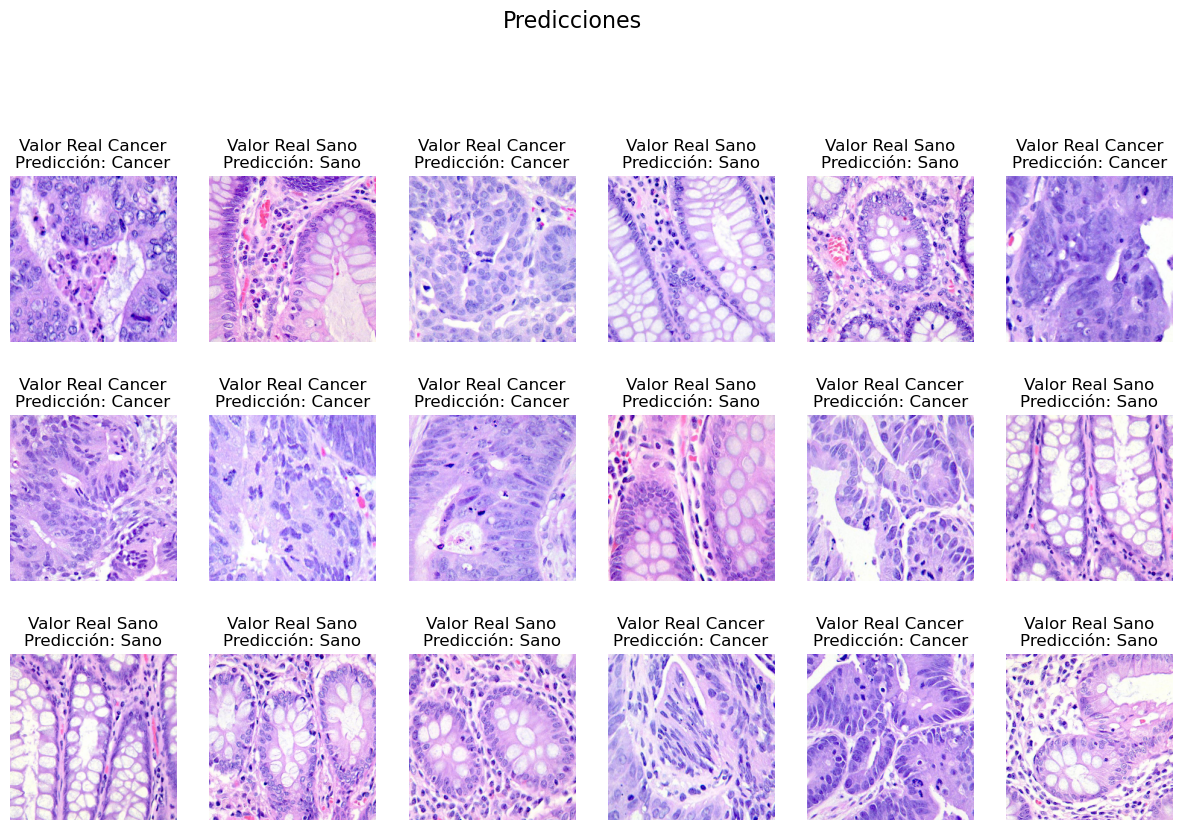

In [12]:
import matplotlib.pyplot as plt
import numpy as np

has_cancer = {0: 'Sano', 1: 'Cancer'}

def plot_images_with_predictions(X, y_true, y_pred):

    plt.figure(figsize=(15, 15))
    indices = np.random.choice(len(X), 18, replace=False)

    for i, index in enumerate(indices, 1):
        plt.subplot(5, 6, i)
        
        # Convertir el tensor a un array NumPy como float32
        image_to_show = X[index].numpy().astype(np.float32)
        
        plt.imshow(image_to_show)
        plt.title(f'Valor Real {has_cancer[y_true[index]]}\nPredicción: {has_cancer[y_pred[index]]}')
        plt.axis('off')

    plt.suptitle("Predicciones", fontsize=16)
    plt.show()


plot_images_with_predictions(X_test, y_test, y_pred)
